In [1]:
import sys
import numpy             as     np
import pylab             as     pl
import astropy.io.fits   as     fits
import matplotlib        as     mpl
import matplotlib.pyplot as     plt

from   astropy.table     import Table
from   matplotlib.pyplot import figure

In [2]:
sys.path.append('/global/homes/m/mjwilson/desi/BGS/lumfn/py/lumfn/')
sys.path.append('/global/homes/m/mjwilson/desi/BGS/lumfn/py/')

In [3]:
from   ajs_kcorr         import ajs_kcorr
from   params            import params
from   distances         import dist_mod
from   zlimits           import zmin, zmax
from   mxxl_ecorr        import mxxl_ecorr

In [4]:
x      = ajs_kcorr()

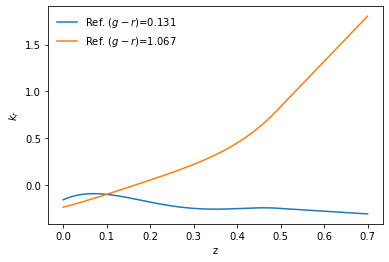

In [5]:
zs     = np.arange(1.e-4, 0.7, 1.e-4)

result = []

for ref_color in [0.131, 1.067]:
    ks = x.ref_eval(ref_color, zs, band='r')

    result.append(ks)
    
    pl.plot(zs, ks, label=r'Ref. $(g-r)$={:.3f}'.format(ref_color))
    
result = np.array(result).T
    
pl.xlabel('z')
pl.ylabel(r'$k_r$')
    
pl.legend(frameon=False)

In [6]:
result.shape

(6999, 2)

In [7]:
kmax = np.maximum(result[:,0], result[:,1])
kmin = np.minimum(result[:,0], result[:,1])

In [8]:
mu   = dist_mod(zs)

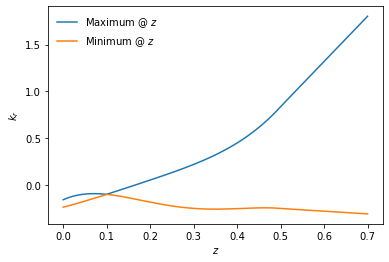

In [9]:
pl.plot(zs, kmax, label='Maximum @ $z$')
pl.plot(zs, kmin, label='Minimum @ $z$')

pl.xlabel('$z$')
pl.ylabel(r'$k_r$')

pl.legend(frameon=False)

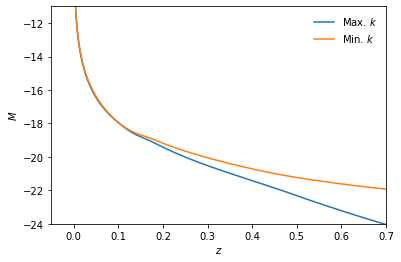

In [16]:
pl.plot(zs, 19.5 - mu - kmax - mxxl_ecorr(zs), label='Max. $k$')
pl.plot(zs, 19.5 - mu - kmin - mxxl_ecorr(zs), label='Min. $k$')

pl.xlabel(r'$z$')
pl.ylabel(r'$M$')

pl.xlim(-0.05, 0.70)
pl.ylim( -24., -11.)

pl.legend(frameon=False, loc=1)

In [11]:
np.savetxt('/global/homes/m/mjwilson/desi/BGS/lumfn/py/lumfn/data/kmax.txt', np.c_[19.5 - mu - kmax - mxxl_ecorr(zs), 19.5 - mu - kmin - mxxl_ecorr(zs), zs, kmax, kmin], fmt='%.6e')

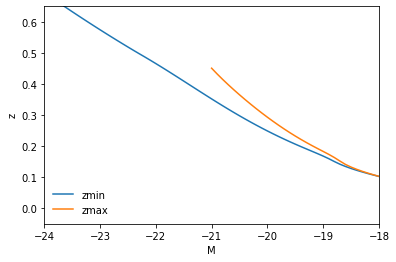

In [15]:
Ms = np.arange(-24., -16., 0.1)

pl.plot(Ms, zmin(Ms), label='zmin')

Ms = np.arange(-21., -16., 0.1)

pl.plot(Ms, zmax(Ms), label='zmax')

pl.xlim(-24., -18.0)
pl.ylim(-0.05, 0.65)

pl.xlabel('M')
pl.ylabel('z')

pl.legend(loc=3, frameon=False)

# Done.